In [349]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns

from sklearn.metrics import homogeneity_score,completeness_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


pd.set_option('display.max_rows', 1300)
pd.set_option('display.max_columns', 1300)
pd.set_option('display.width', 1300)

In [350]:
# prepare data

# loop thr
trainData = pd.read_csv('CS98XRegressionTrain.csv')
trainData = pd.DataFrame(trainData)


testData = pd.read_csv('CS98XRegressionTest.csv')
testData = pd.DataFrame(testData)

#print(wholeList)

In [351]:
# check shape of the data
print('train data shape:',trainData.shape)
print('test data shape:',testData.shape)


train data shape: (453, 15)
test data shape: (114, 14)


In [352]:
# check the info of the data
print('train data info:',trainData.info())
print('test data info:',testData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB
train data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------   

In [353]:
# check if duplicate row exist in test data and train data

print('train data duplicated:',trainData.duplicated().any())
print('test data duplicated:',testData.duplicated().any())

train data duplicated: False
test data duplicated: False


In [354]:
# check if any NaN cell
print('train data NaN:',trainData.columns[trainData.isnull().any()])
print('test data NaN:',testData.columns[testData.isnull().any()].isnull())


train data NaN: Index(['top genre'], dtype='object')
test data NaN: [False]


In [355]:
# filter out the NaN rows 
# 1) run drop if empty found
# 2) create a new dataframe that for future use
if not(trainData.columns[trainData.isnull().any()].isnull()):
    trainDataClean = trainData.drop(trainData[trainData['top genre'].isnull()].index)
testDataClean = testData.copy()
print (trainDataClean.describe())


               Id         year         bpm        nrgy        dnce          dB        live         val         dur       acous        spch         pop
count  438.000000   438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000
mean   227.600457  1990.881279  118.326484   60.504566   59.780822   -8.787671   17.605023   59.625571  228.267123   32.191781    5.671233   61.557078
std    130.463047    16.697047   25.175735   22.089660   15.404757    3.591005   13.807492   24.480160   63.426812   29.279912    5.571392   12.759353
min      1.000000  1948.000000   62.000000    7.000000   18.000000  -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   26.000000
25%    116.250000  1976.000000  100.000000   44.000000   50.000000  -11.000000    9.000000   42.250000  184.500000    7.000000    3.000000   54.000000
50%    226.500000  1993.000000  120.000000   64.000000   62.000000   -8.000000   13.000000   6

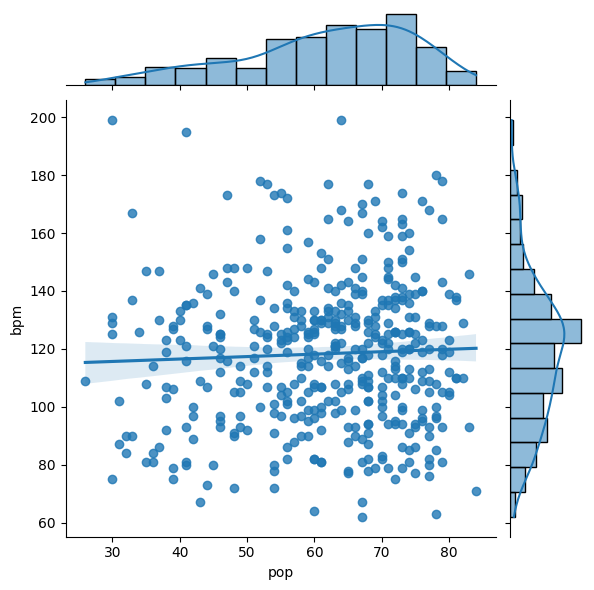

In [356]:
# Exploratory Data Analysis(EDA)
# 1)pop vs bpm
sns.jointplot(x='pop',y='bpm',data=trainDataClean,kind="reg")

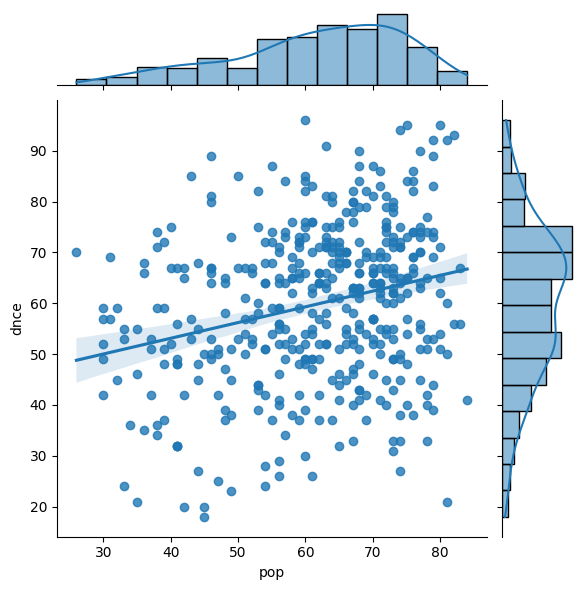

In [357]:
# 2)dnce vs pop
sns.jointplot(x='pop',y='dnce',data=trainDataClean,kind="reg")

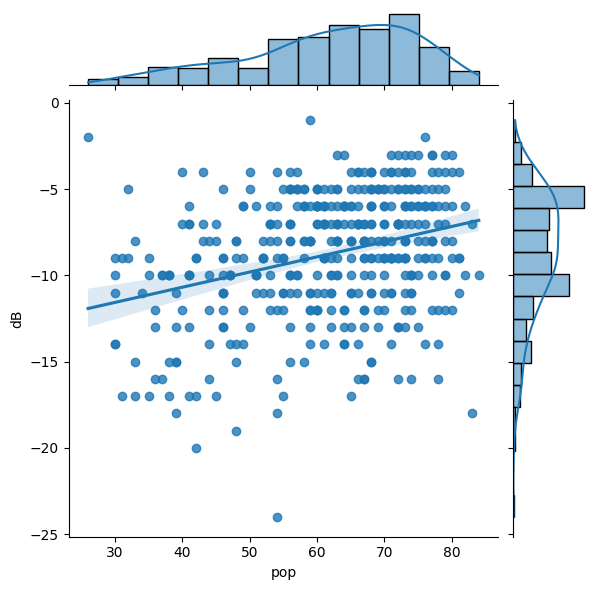

In [358]:
# 3)dB vs pop
sns.jointplot(x='pop',y='dB',data=trainDataClean,kind="reg")

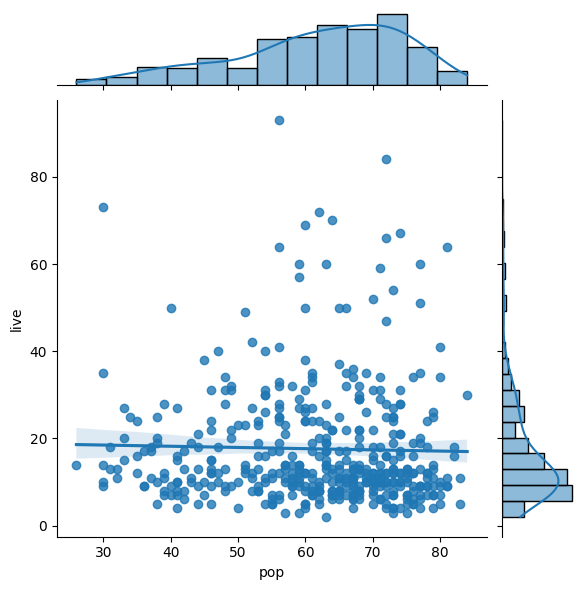

In [359]:
# 4)live vs pop
sns.jointplot(x='pop',y='live',data=trainDataClean,kind="reg")

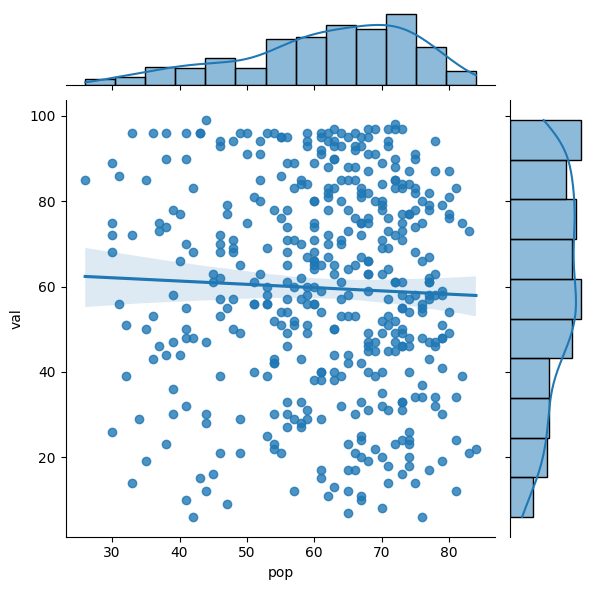

In [360]:
# 5)val vs pop
sns.jointplot(x='pop',y='val',data=trainDataClean,kind="reg")

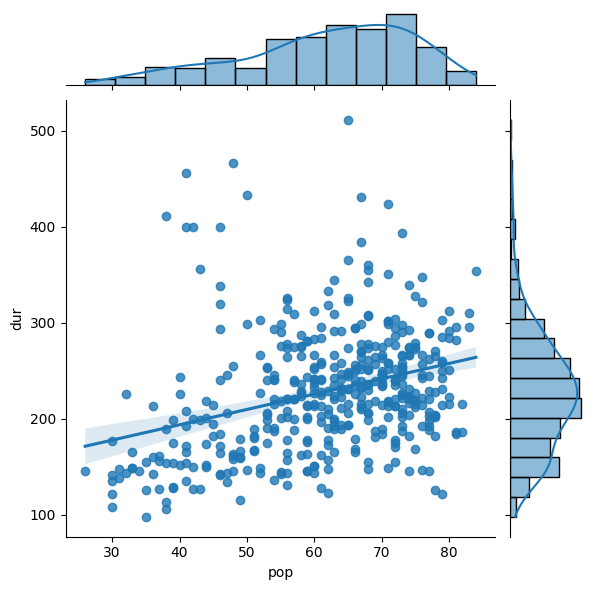

In [361]:
# 6)dur vs pop
sns.jointplot(x='pop',y='dur',data=trainDataClean,kind="reg")

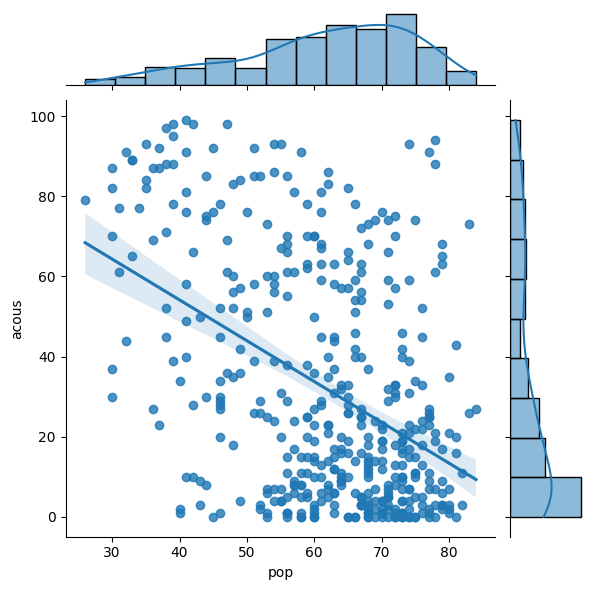

In [362]:
# 7)acous vs pop
sns.jointplot(x='pop',y='acous',data=trainDataClean,kind="reg")

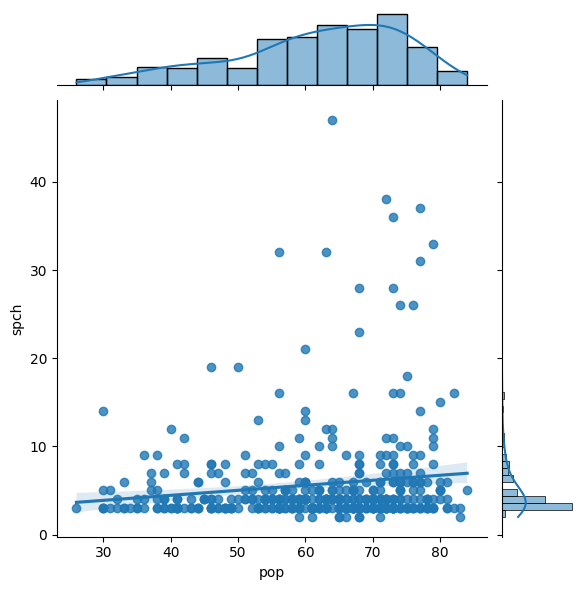

In [363]:
# 8)spch vs pop
sns.jointplot(x='pop',y='spch',data=trainDataClean,kind="reg")

In [397]:
# seperated list - train data

y = trainDataClean["pop"]
x = trainDataClean.drop(columns=["top genre","Id","artist","title","year","pop"])

stdScaler = StandardScaler()
xScaled = stdScaler.fit_transform(x)

polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeat.fit_transform(x)
xPolyScaled = stdScaler.fit_transform(xPoly)



In [365]:
# seperate list - test data
xTest = testDataClean.drop(columns=["top genre","Id","artist","title","year"])

stdScaler = StandardScaler()
xScaledTest = stdScaler.fit_transform(xTest)

polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPolyScaledTest = polyFeat.fit_transform(xTest)
xPolyScaledTest = stdScaler.fit_transform(xPolyScaledTest)

In [366]:
# 1)Decision Tree Regression
# scaled x is not applied for this sample as decision tree do not require scaling
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=5) # explore min_samples = e.g. put to 1 to see what happens
tree.fit(x,y)
predTreeTrain = tree.predict(x) # Check fit
linearMse = mean_squared_error(y, predTreeTrain)
linearRmse = np.sqrt(linearMse)
print("Tree Rmse:",linearRmse)
# Check on test set
predTreeTest = tree.predict(xTest) # Check fitpredTreeTrain
print(predTreeTest)
np.savetxt("my_data_tree.csv", predTreeTest, delimiter=",", 
           header="pop", comments="")

Tree Rmse: 6.867438978769967
[73.75       71.16666667 53.66666667 51.375      68.         72.4
 53.66666667 45.2        71.16666667 62.25       70.66666667 61.28571429
 70.66666667 75.         73.75       55.16666667 63.         68.4
 65.71428571 65.83333333 39.2        69.25       68.         45.2
 58.16666667 68.6        60.5        47.         36.33333333 76.66666667
 73.4        52.4        70.875      71.16666667 68.6        73.75
 60.66666667 53.66666667 68.4        63.6        75.2        75.2
 61.28571429 36.33333333 75.         66.         62.25       47.
 68.8        64.28571429 46.2        75.2        58.16666667 35.125
 61.57142857 69.25       72.4        45.4        68.42857143 38.8
 55.16666667 71.16666667 76.66666667 71.42857143 68.42857143 68.4
 78.4        53.66666667 60.66666667 47.         76.66666667 61.57142857
 47.875      63.6        61.57142857 71.42857143 76.66666667 71.28571429
 78.4        47.875      76.66666667 70.83333333 40.83333333 73.16666667
 68.      

In [367]:
# 2) poly SVR
# instead of scaled x , we use scaled polynomial featured x (degree=2)as we are going to apply poly SVR(degree=2))
from sklearn.svm import SVR
svrPoly = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svrPoly.fit(xPolyScaled,y)

# Check on test set
predSVRPolyTest = svrPoly.predict(xPolyScaledTest) # Check fitpredTreeTrain
print(predSVRPolyTest)
np.savetxt("my_data_SVR.csv", predSVRPolyTest, delimiter=",", 
           header="pop", comments="")

[ 59.71410682  68.53912383  55.72898748  57.69908554  58.47528199
  68.79482828  57.31656477  40.64382277  66.11471486  68.03274513
  52.34674755  70.78967691  44.40226362  64.22699461  69.29942692
  63.9643356   60.18104325  63.8712722   81.31902083  63.54301098
  66.84827126  62.75864505  48.3489712   58.01540526  44.7566523
  68.56608851  59.09739183  59.61930595  52.38646319  87.55714496
  74.37971663  64.95697193  71.02380345  68.49852421  68.81526726
  84.46703627  63.48380856  51.47032432  61.32384255  65.77898877
  68.8301048   67.43787806  71.22726834  58.72724432  67.23217178
  58.49939391  60.43925644  65.92300149  66.9366533   63.5307311
  58.1713368   68.77135122  66.07629769  52.44440061  69.94670101
  65.34840336  66.51761708  51.01641303  70.23759247  45.48524375
  63.90067152  68.06437901  67.87391711  64.50082073  68.44671494
  51.64703904  78.68538144  48.6640319   64.70822904  60.80174393
  64.62669843  52.24479451  55.9517003   69.0089296   63.7453808
  74.42408441

In [407]:
# 3) bagging with polySVR
from sklearn.ensemble import BaggingRegressor

baggedReg = BaggingRegressor(base_estimator=SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale"),n_estimators=10, random_state=0,bootstrap=True, n_jobs=-1)
baggedReg.fit(xPolyScaled,y)

# Check on test set
predbaggedSVRPolyTest = baggedReg.predict(xPolyScaledTest)     
print(predbaggedSVRPolyTest)
np.savetxt("my_data_bagged_SVR.csv", predbaggedSVRPolyTest, delimiter=",", 
           header="pop", comments="")

[ 60.25399492  66.71791868  62.2964307   58.52476399  59.59414735
  69.19161208  63.00620524  38.71670846  66.76070683  66.689696
  51.91792547  68.72078012  46.56242871  65.32873427  67.46202716
  64.67968322  61.2437353   63.24991695  82.59766876  66.14310326
  64.80183962  62.41581467  47.46715854  53.27828396  73.4187567
  67.32935236  60.35916162  61.30526692  49.58871725  84.0892337
  69.80573594  58.53081681  73.24923431  69.80764221  69.64200631
  87.55269375  62.06728531  55.42975379  61.40062696  64.61256261
  69.44490477  62.68702306  73.51693454  56.81932016  69.02357145
  62.44093733  59.25743014  67.22074279  64.17030806  64.67636749
  56.85021654  69.43102803  66.72738249  48.4446086   66.2846039
  63.00453983  67.36365137  50.2161053   72.88963005  39.57824863
  62.99659259  69.74260016  69.91265206  65.49947014  67.67487221
  51.25604467  71.39720893  50.15765135  64.93080949  63.35972208
  69.6325253   51.56252831  53.9181018   67.39220654  61.8518093
  74.10600693  7

In [400]:
# 4)
from sklearn.ensemble import RandomForestRegressor
randomForestReg = RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1)
randomForestReg.fit(xScaled, y)
ypred = randomForestReg.predict(xScaledTest)

print(randomForestReg.feature_importances_)
np.savetxt("my_data_randomForest.csv", predTreeTest, delimiter=",",header="pop", comments="")



[0.07148816 0.088647   0.07142286 0.08304361 0.05495613 0.06908076
 0.36501806 0.15718861 0.03915481]
